## Fractional Kelvin-Voigt

In [1]:
using RHEOS
include("plotmodel.jl");

┌ Info: Recompiling stale cache file /home/alessandra/.julia/compiled/v1.1/RHEOS/8Ut5K.ji for RHEOS [728860ae-c896-11e8-0b91-0f38ecad5046]
└ @ Base loading.jl:1184
┌ Warning: Package DSP does not have Statistics in its dependencies:
│ - If you have DSP checked out for development and have
│   added Statistics as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with DSP
└ Loading Statistics into DSP from project dependency, future warnings for DSP are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for RHEOS [728860ae-c896-11e8-0b91-0f38ecad5046]
│   exception = ErrorException("Required dependency DSP [717857b8-e6f2-59f4-9121-6e50c889abd2] failed to load from a cache file.")
└ @ Base loading.jl:969
┌ Info: Recompiling stale cache file /home/alessandra/.julia/compiled/v1.1/DSP/OtML7.ji for DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loa

In [2]:
Fract_KelvinVoigt


Model name: fractKV

Free parameters: cₐ, a, cᵦ and β

                ________ ╱╲ ________
               |         ╲╱  cₐ, a  |
           ____|                    |____
               |                    |
               |________ ╱╲ ________|
                         ╲╱  cᵦ, β
                

### Constitutive equation

$\sigma(t) = c_\alpha \frac{d^{\alpha} \epsilon(t)}{dt^{\alpha}}+ c_{\beta} \frac{d^\beta \epsilon(t)}{dt^\beta}$


Assuming $0 \leq \beta \leq \alpha \leq 1$

### Relaxation modulus

$G(t) =\frac{c_{\alpha} }{\Gamma(1-\alpha)} t^{-\alpha}+\frac{c_{\beta} }{\Gamma(1-\beta)} t^{-\beta}$  

### Creep modulus

$J(t) = \frac{t^{\alpha}}{c_\alpha} E_{\alpha-\beta,1+\alpha}\left(-\frac{c_\beta}{c_\alpha} t^{\alpha-\beta}\right)$ 

### Storage modulus

$ G^{\prime}(\omega) = c_\alpha \omega^\alpha \cos\left(\alpha \frac{\pi}{2}\right) + c_\beta \omega^\beta \cos \left( \beta \frac{\pi}{2}\right)$

### Loss modulus

$G^{\prime\prime}(\omega) = c_\alpha \omega^\alpha \sin\left(\alpha \frac{\pi}{2}\right) + c_\beta \omega^\beta \sin \left( \beta \frac{\pi}{2}\right)$


## Fractional (Spring) Kelvin-Voigt

In [3]:
FractS_KelvinVoigt


Model name: fractSpringKV

Free parameters: cₐ, a and k

                ________ ╱╲ ________
               |         ╲╱  cₐ, a  |
           ____|                    |____
               |                    |
               |____╱╲  ╱╲  ╱╲  ____|
                      ╲╱  ╲╱  ╲╱
                                k
                

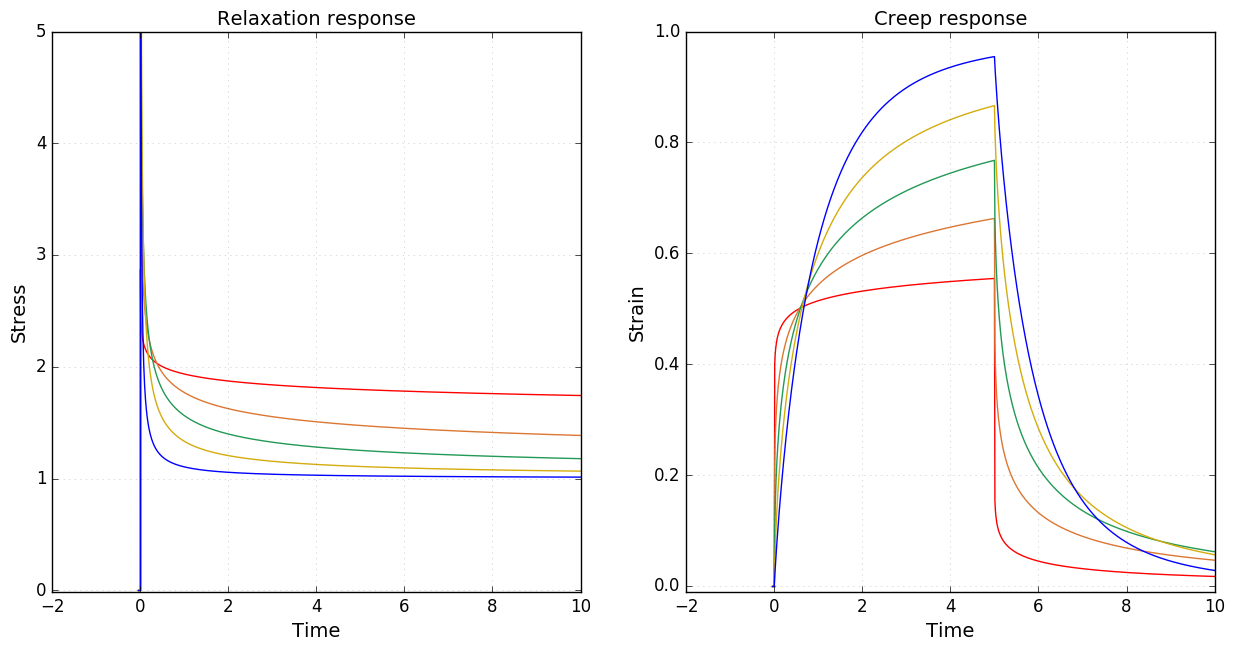

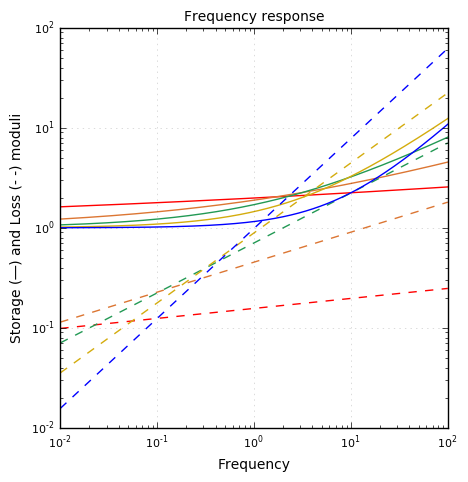

In [4]:
models = Vector{RheoModel}()

# plot moduli for varying α
for (i,alpha) in enumerate([0.1, 0.3, 0.5, 0.7, 0.9])
    
    models = vcat(models,RheoModel(FractS_KelvinVoigt,(cₐ = 1.0, a = alpha, k = 1.0)))
 
end

plotmodel(models, ymaxG = 5.0);

## Fractional (Dashpot) Kelvin-Voigt

In [5]:
FractD_KelvinVoigt


Model name: fractDashpotKV

Free parameters: η, cᵦ and β

                        ___
                _________| |________
               |        _|_| η      |
           ____|                    |____
               |                    |
               |________ ╱╲ ________|
                         ╲╱  cᵦ, β
                

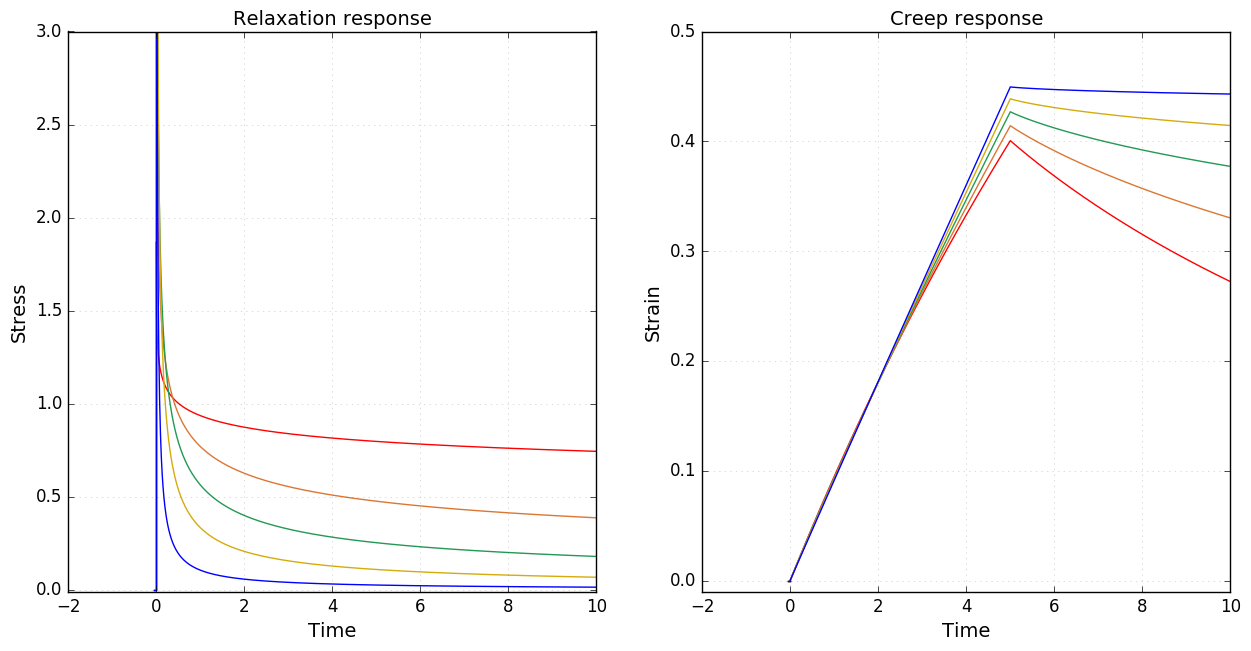

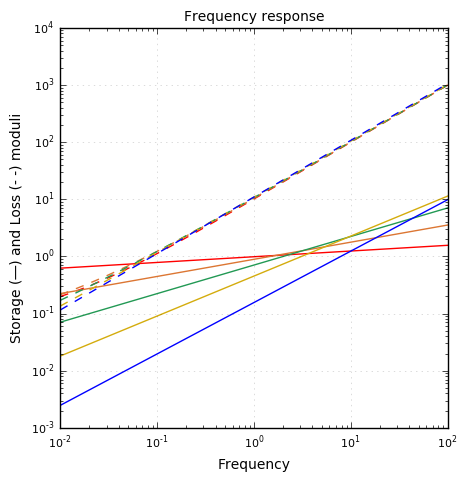

In [6]:
models = Vector{RheoModel}()

# plot moduli for varying β
for (i,beta) in enumerate([0.1, 0.3, 0.5, 0.7, 0.9])
    
    models = vcat(models,RheoModel(FractD_KelvinVoigt,(η = 10, cᵦ= 1.0, β = beta)))
 
end

plotmodel(models, ymaxG = 3.0);


## Kelvin-Voigt model

In [7]:
KelvinVoigt


Model name: KV

Free parameters: η and k

                        ___
                _________| |________
               |        _|_| η      |
           ____|                    |____
               |                    |
               |____╱╲  ╱╲  ╱╲  ____|
                      ╲╱  ╲╱  ╲╱
                                k
                

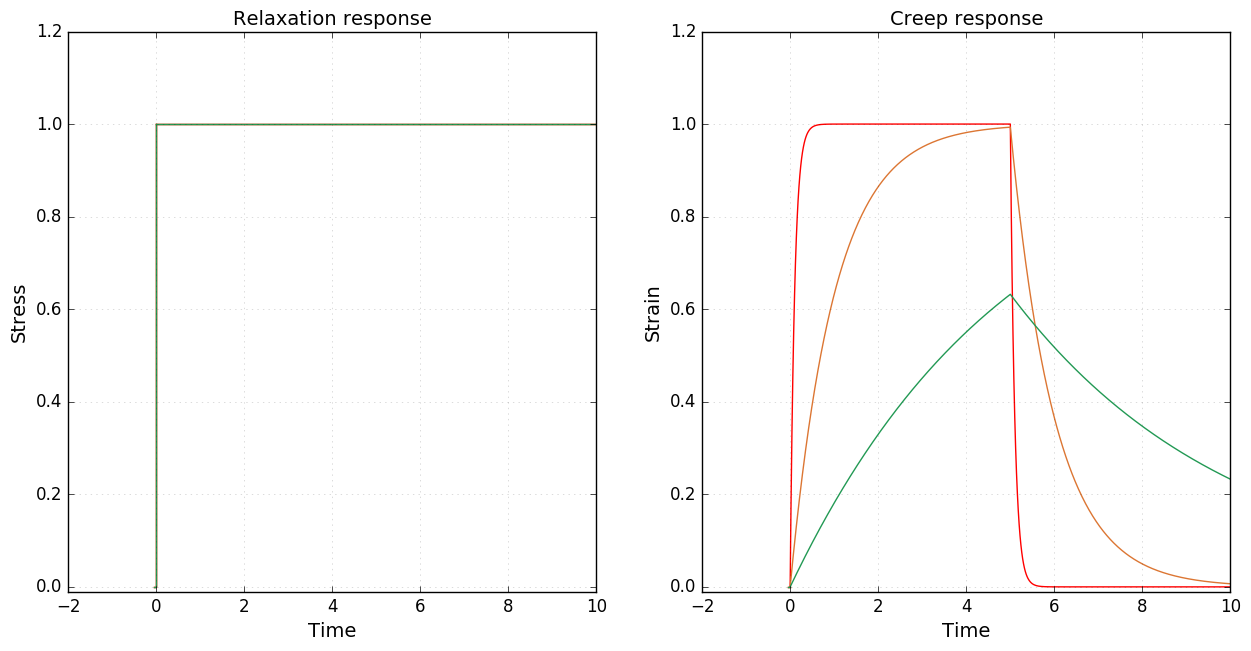

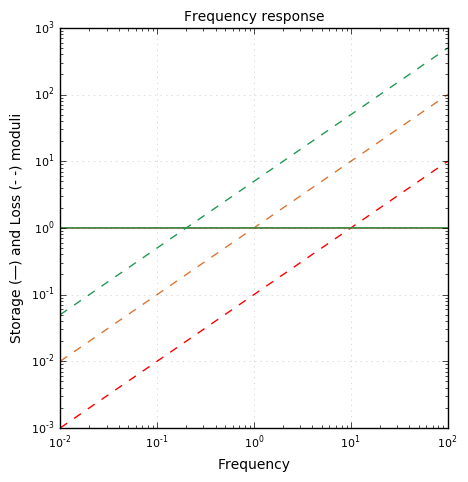

In [8]:
models = Vector{RheoModel}()

# plot moduli for varying k
for (i,η) in enumerate([0.1, 1.0, 5.0])
    
    models = vcat(models,RheoModel(KelvinVoigt,(η = η, k = 1)))
 
end

plotmodel(models);